# Uso de DBSCAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics, preprocessing

In [2]:
db = datasets.make_blobs
fitness = preprocessing.StandardScaler()

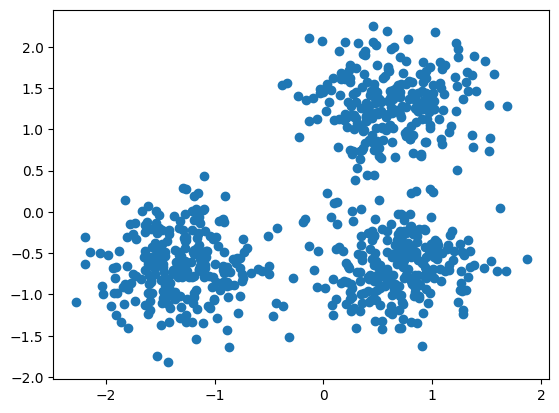

In [4]:
centers = [[1, 1], [-1, -1], [1, -1]]
x, labels_true = db(
    n_samples = 750,
    centers = centers,
    cluster_std = 0.4,
    random_state = 0
)
X = fitness.fit_transform(x)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [8]:
dbscan = cluster.DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Número de clusters: %d" % n_clusters)
print("Número estimado de ruido: %d" % n_noise)

Número de clusters: 3
Número estimado de ruido: 18


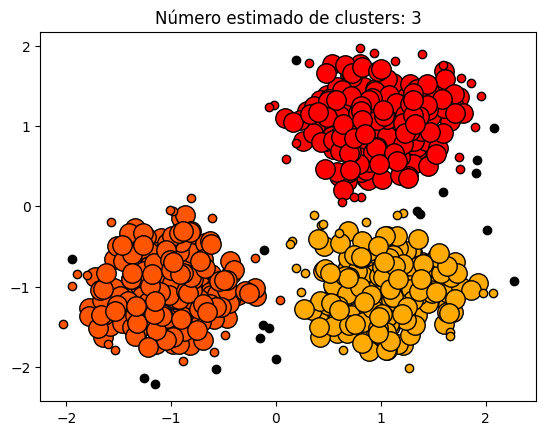

In [20]:
unique = set(labels)
mask = np.zeros_like(labels, dtype=bool)
mask[dbscan.core_sample_indices_] = True

colors = [
    plt.cm.autumn(each) for each in np.linspace(0, 1, len(unique))
]

for k, col in zip(unique, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_mask = labels == k

    xy = x[class_mask & mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor = tuple(col),
        markeredgecolor = "k",
        markersize = 14
    )

    xy = x[class_mask & ~mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor = tuple(col),
        markeredgecolor = "k",
        markersize = 6
    )

plt.title("Número estimado de clusters: %d" % n_clusters)
plt.show()